# Import Library

In [ ]:
!pip install tensorflow-addons

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, TimeDistributed, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import os, shutil
import zipfile
import random
from random import sample
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

In [ ]:
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Data Loading

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !kaggle datasets download grassknoted/asl-alphabet

In [ ]:
# !unzip asl-alphabet.zip

In [ ]:
# import shutil

# shutil.move('/content/asl_alphabet_train/asl_alphabet_train', '/content/drive/MyDrive/Capstone/Dataset/')

In [ ]:
# shutil.move('/content/asl_alphabet_test/asl_alphabet_test', '/content/drive/MyDrive/Capstone/Dataset/')

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Path awal
# source_dir = '/content/SIBI'
# target_dir = '/content/SIBI Split'
# classes = os.listdir(source_dir)

# # Rasio split
# test_ratio = 0.2

# for class_name in classes:
#     class_path = os.path.join(source_dir, class_name)
#     images = os.listdir(class_path)

#     train_imgs, test_imgs = train_test_split(images, test_size=test_ratio, random_state=42)

#     # Buat folder tujuan jika belum ada
#     for split in ['train', 'test']:
#         split_class_dir = os.path.join(target_dir, split, class_name)
#         os.makedirs(split_class_dir, exist_ok=True)

#     # Salin file ke folder train/test
#     for img in train_imgs:
#         shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'train', class_name, img))
#     for img in test_imgs:
#         shutil.copy(os.path.join(class_path, img), os.path.join(target_dir, 'test', class_name, img))

In [ ]:
# # Path dataset
# path = "/content/SIBI"

# # Buat kamus untuk simpan nama file per kelas
# alphabet_image = {}
# class_names = sorted(os.listdir(path))

# # Bangun kamus kelas -> daftar nama file gambar
# for class_name in class_names:
#     class_path = os.path.join(path, class_name)
#     if os.path.isdir(class_path):
#         image_list = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
#         alphabet_image[class_name] = image_list

# # Buat plot
# fig, axs = plt.subplots(len(class_names), 5, figsize=(15, len(class_names) * 2))

# for i, class_name in enumerate(class_names):
#     image_list = alphabet_image[class_name]
#     selected_images = np.random.choice(image_list, 5, replace=len(image_list) < 5)

#     for j in range(5):
#         img_path = os.path.join(path, class_name, selected_images[j])
#         img = Image.open(img_path).convert("RGB")
#         axs[i, j].imshow(img)
#         axs[i, j].set_title(class_name)
#         axs[i, j].axis("off")

# fig.tight_layout()
# plt.show()

In [ ]:
# # Definisikan path sumber
# alphabet_path = "/content/SIBI"

# # Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
# file_name = []
# labels = []
# full_path = []

# # Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
# for path, subdirs, files in os.walk(alphabet_path):
#     for name in files:
#         full_path.append(os.path.join(path, name))
#         labels.append(path.split('/')[-1])
#         file_name.append(name)

# distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# # Plot distribusi gambar di setiap kelas
# Label = distribution_train['labels']
# plt.figure(figsize = (6,6))
# sns.set_style("darkgrid")
# plot_data = sns.countplot(Label)

# Building Model

In [ ]:
train_dir = '/content/drive/MyDrive/Capstone/Dataset5(removebg)'

In [ ]:
for x in os.listdir(train_dir):
  print(x, len(os.listdir('/'.join([train_dir,x]))))

A 1095
B 1095
C 1095
D 1025
E 1095
F 1095
G 1095
K 1095
O 1095
H 1095
P 1095
L 1095
I 1095
Q 1095
M 1095
J 875
R 1068
N 1095
U 1095
S 1095
T 1095
Z 874
X 1095
blank 876
del 875
Y 1095
V 1095
W 1095
space 875


In [ ]:
labels =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','blank','del','space']

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

BATCH_SIZE = 128
IMAGE_SIZE = (224, 224)  # MobileNet input size

datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values (0-255 → 0-1)
    # rotation_range=20,        # Randomly rotate images by ±20 degrees
    # width_shift_range=0.2,    # Random horizontal shift (up to 20% of width)
    # height_shift_range=0.2,   # Random vertical shift (up to 20% of height)
    # brightness_range=[0.8, 1.2],  # Adjust brightness randomly (80%-120%)
    # shear_range=0.2,          # Shear transformation
    # zoom_range=0.2,           # Random zoom (±20%)
    validation_split=0.2      # Splitting dataset (80% train, 20% validation)
)

SEED = 42  # bebas, asal konsisten

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

Found 24448 images belonging to 29 classes.
Found 6110 images belonging to 29 classes.


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

IMG_SHAPE = IMAGE_SIZE + (3,)

base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

base_model.trainable = False

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-20:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Reduced dense size
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Reduced dense size
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627,677 (10.02 MB)

 Trainable params: 1,573,213 (6.00 MB)

 Non-trainable params: 1,054,464 (4.02 MB)

None


In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('/content/drive/MyDrive/Capstone/31-5-25/5-31_mobilenet_best_model_1.h5')

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

In [ ]:
# from PIL import Image
# import os

# image_folder = '/content/drive/MyDrive/Capstone/Dataset3'

# for root, dirs, files in os.walk(image_folder):
#     if root == '/content/drive/MyDrive/Capstone/Dataset3/Z':
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 with Image.open(file_path) as img:
#                     img.verify()  # Validasi gambar
#             except Exception as e:
#                 print(f'❌ Rusak: {file_path} - {e}')

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-9, verbose=1)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Capstone/2-6-25/6-9_mobilenet_best_model_removebg.keras', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(
    train_generator,
    validation_data=valid_data,
    epochs=10,
    callbacks=[early_stopper, reduce_lr, checkpoint],
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 72s/step - accuracy: 0.5004 - loss: 7.7313  
Epoch 1: val_loss improved from inf to 6.26521, saving model to /content/drive/MyDrive/Capstone/2-6-25/6-9_mobilenet_best_model_removebg.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 16860s 88s/step - accuracy: 0.5015 - loss: 7.7259 - val_accuracy: 0.7023 - val_loss: 6.2652 - learning_rate: 1.0000e-04
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9447 - loss: 5.1472 
Epoch 2: val_loss improved from 6.26521 to 4.87564, saving model to /content/drive/MyDrive/Capstone/2-6-25/6-9_mobilenet_best_model_removebg.keras
191/191 ━━━━━━━━━━━━━━━━━━━━ 2358s 12s/step - accuracy: 0.9447 - loss: 5.1457 - val_accuracy: 0.8043 - val_loss: 4.8756 - learning_rate: 1.0000e-04
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9782 - loss: 4.0211 
Epoch 3: val_loss improved from 4.87564 to 3.58251, saving model to /content/drive/MyDrive/Capstone/2-6-25/6-9_mobilenet_best_model_removebg.keras
191/

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import tensorflowjs as tfjs

# Simpan dalam format TensorFlow.js
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Capstone/2-6-25/6-2_mobilenet_tfjs3/')

failed to lookup keras version from the file,
    this is likely a weight only file


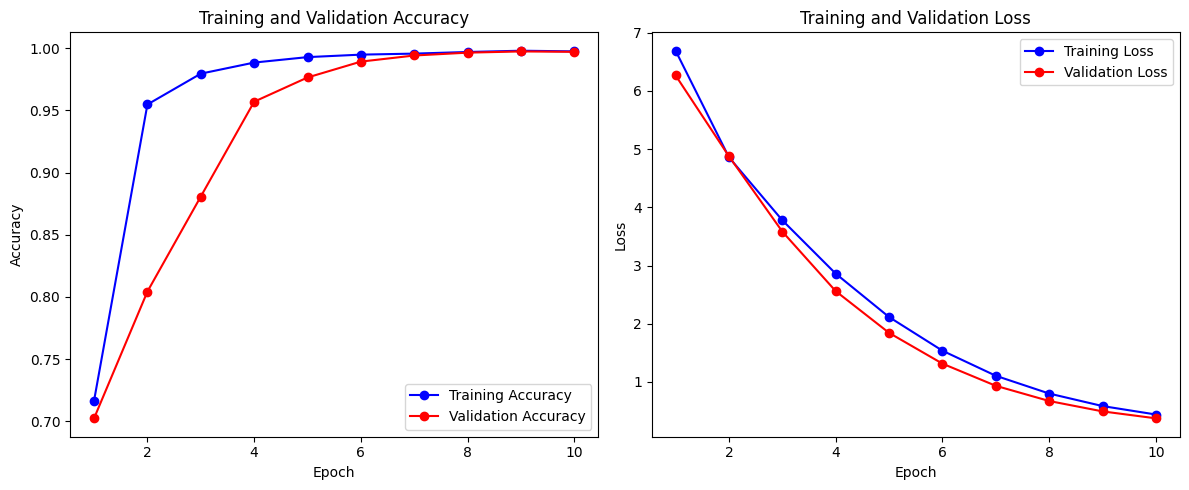

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Grafik Akurasi
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Grafik Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan grafik
plot_training_history(history)

In [3]:
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('6-9_mobilenet_best_model_removebg.keras')

# 1. Pastikan valid_data tidak di-shuffle agar urutan prediksi dan label cocok
valid_data = datagen.flow_from_directory(
    'val',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=False  # Penting!
)

# 2. Prediksi seluruh validasi dataset
y_pred_prob = model.predict(valid_data, verbose=1)
y_pred = np.argmax(y_pred_prob, axis=1)

# 3. Ambil label asli
y_true = valid_data.classes  # array of true labels

# 4. Ambil nama kelas
class_labels = list(valid_data.class_indices.keys())

# 5. Cetak classification report
from sklearn.metrics import classification_report

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_true, y_pred, target_names=class_labels))


Found 1298 images belonging to 29 classes.


f:\KULIAH II\MBKM\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           A       0.98      1.00      0.99        45
           B       1.00      1.00      1.00        45
           C       1.00      1.00      1.00        45
           D       1.00      0.97      0.99        40
           E       0.96      0.98      0.97        45
           F       1.00      1.00      1.00        45
           G       0.88      0.98      0.93        45
           H       0.96      0.53      0.69        45
           I       0.76      1.00      0.87        45
           J       1.00      0.44      0.62        45
           K       0.57      1.00      0.73        45
           L       1.00      0.98      0.99        45
           M       0.00      0.00      0.00        45
           N       0.44      1.00      0.61        45
           O       1.00      1.00      1.00        45
           P       1.00      0.91      0.95        45
           

f:\KULIAH II\MBKM\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\KULIAH II\MBKM\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\KULIAH II\MBKM\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Found 5195 images belonging to 29 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


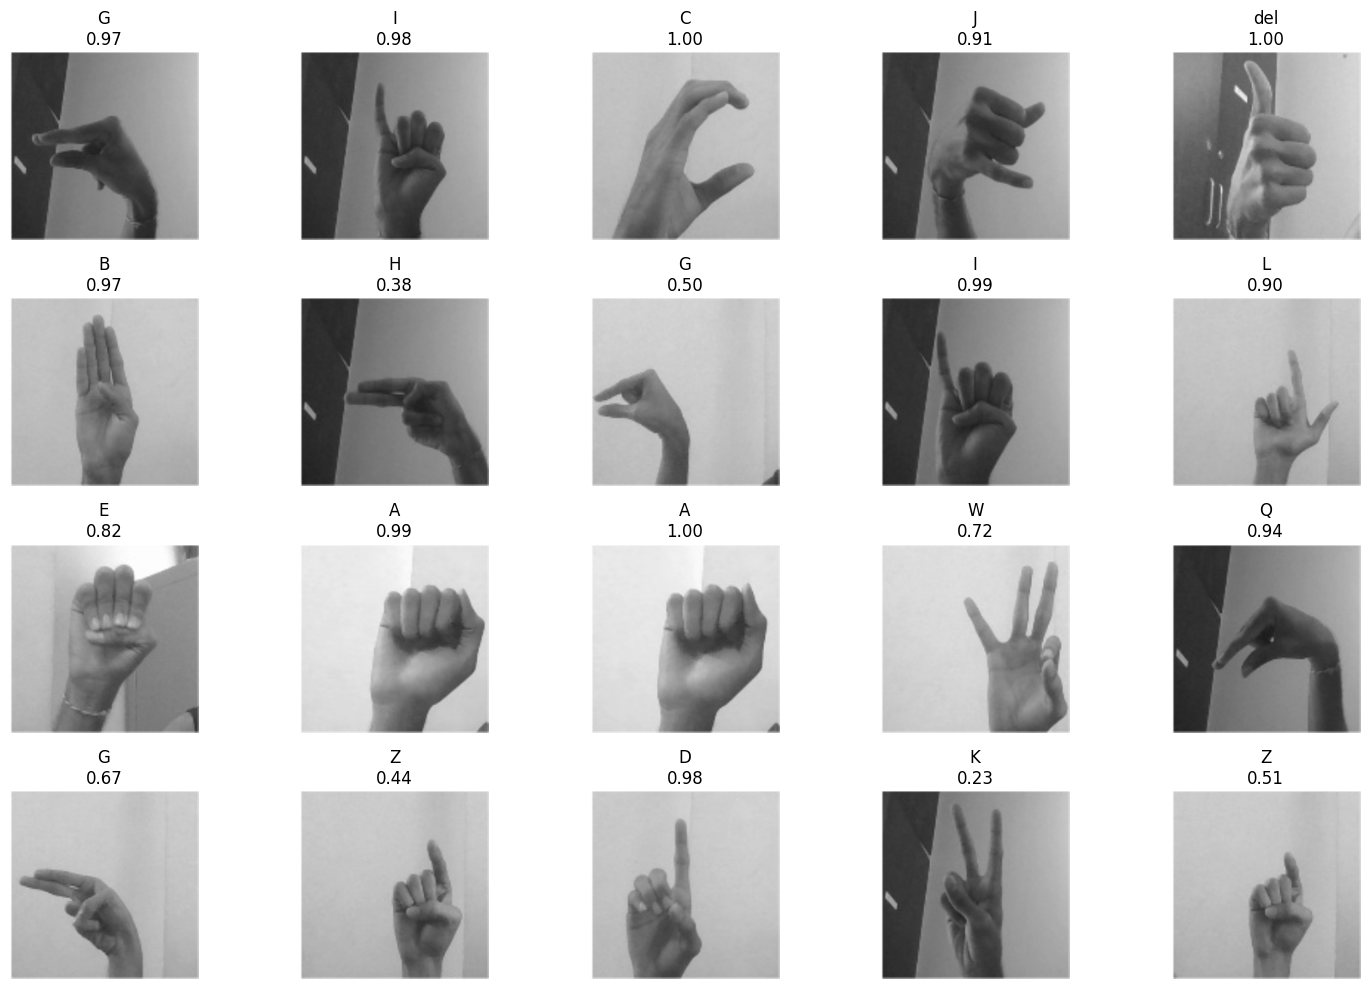

In [6]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 128
IMAGE_SIZE = (224, 224)  # Sesuaikan dengan ukuran input model jika perlu

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

SEED = 42

test_generator = datagen.flow_from_directory(
    'val',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

# Ambil 10 path gambar secara acak dari test set
sample_paths = random.sample(test_generator.filepaths, 20)

# Label (pastikan sesuai urutan output model)
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
          'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
          'Y', 'Z', 'blank', 'del', 'space']

# Buat figure untuk subplot
plt.figure(figsize=(15, 10))

# Loop untuk setiap gambar
for i, path in enumerate(sample_paths):
    # Load dan preprocess gambar
    img = cv2.imread(path)
    img = cv2.resize(img, IMAGE_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_norm = img.astype(np.float32) / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    # Prediksi menggunakan model Keras
    pred = model.predict(img_input)
    predicted_class = np.argmax(pred)
    confidence = np.max(pred)
    predicted_label = labels[predicted_class]

    # Plot di subplot
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{predicted_label}\n{confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Konvert

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from tensorflow.keras.models import load_model

In [ ]:
# model = load_model('/content/drive/MyDrive/Capstone/31-5-25/5-31_mobilenet_best_model_1.h5')

In [ ]:
# model.summary()

In [ ]:
# import tensorflowjs as tfjs

# # Simpan dalam format TensorFlow.js
# tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Capstone/31-5-25/5-31_mobilenet_tfjs/')

In [ ]:
# !pip install tensorflowjs


In [ ]:
# !tensorflowjs_converter\
#  --input_format=keras\
#       /content/drive/MyDrive/Capstone/31-5-25/5-31_mobilenet_best_model_1.h5\
#            /content/drive/MyDrive/Capstone/31-5-25/5-31_mobilenet_tfjs/